# JAM FITTER

In [1]:
import sys,os
from fitlab.resman import RESMAN
from fitlab.mcsamp import MCSAMP
from tools.config import load_config,conf
from tools.tools import load, save,checkdir
import pylab as py
import numpy as np
import pandas as pd
import copy
def lprint(msg):
    sys.stdout.write('\r')
    sys.stdout.write('%s' %msg)
    sys.stdout.flush()
%matplotlib inline

## dy parameters

In [2]:
dy=3.25
prefix='325'
# Inputs
summary_dy = '../samples_alexei_gk/summary_alexei_dy'+prefix+'.mcp'
config_dy = '../inputs_alexei_gk/upol_hermes_alexei'+prefix+'.py'
# out
sid_dy = 'sidis.dat'
dat_thy_dy = 'data_and_thy.dat'
fig_seperation_dy = 'separation_alexei'+prefix+'.pdf'
fig_hermes_dy = 'hermes_fit_alexei'+prefix+'.pdf'


## setup path to store the results 

In [3]:
path2results='sidis_torino'
checkdir(path2results)

## data sets 

In [4]:
conf['datasets']={}

## SIDIS FUU 

In [5]:
conf['datasets']['sidis']={}
conf['datasets']['sidis']['filters']={}
conf['datasets']['sidis']['filters'][0]={}
conf['datasets']['sidis']['filters'][0]['idx']=[1000,1001,1004,1005,1002,1003,1006,1007]
conf['datasets']['sidis']['filters'][0]['filter']="z>0.2 and z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9 and dy>1.25"




conf['datasets']['sidis']['xlsx']={}
conf['datasets']['sidis']['xlsx'][1000]='sidis/expdata/1000.xlsx'  # |  proton   | pi+    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1001]='sidis/expdata/1001.xlsx'  # |  proton   | pi-    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1004]='sidis/expdata/1004.xlsx'  # |  deuteron | pi+    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1005]='sidis/expdata/1005.xlsx'  # |  deuteron | pi-    | M_Hermes | hermes 

conf['datasets']['sidis']['xlsx'][1002]='sidis/expdata/1002.xlsx'  # |  proton   | k+    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1003]='sidis/expdata/1003.xlsx'  # |  proton   | k-    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1006]='sidis/expdata/1006.xlsx'  # |  deuteron | k+    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1007]='sidis/expdata/1007.xlsx'  # |  deuteron | k-    | M_Hermes | hermes 

conf['datasets']['sidis']['norm']={}
for k in conf['datasets']['sidis']['xlsx']: conf['datasets']['sidis']['norm'][k]={'value':1,'fixed':True,'min':0,'max':1} 


## parameters

In [6]:
conf['params']={}
conf['basis']='default'

### PDF parameters

In [7]:
conf['params']['gk']={}
conf['params']['gk']['gk0']  ={'value':   -1.18546e-01,'min': -0.3,'max':0,'fixed':False}
conf['params']['gk']['Q0']  ={'value':    1.47641e+00,'min':0.8,'max':2,'fixed':False}

# TMD PDF:
conf['params']['pdf']={}
conf['params']['pdf']['widths1_uv']  ={'value':    5.48709e-01,'min': 0.1,'max':0.7,'fixed':False}
conf['params']['pdf']['widths2_uv']  ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['pdf']['widths1_dv']  ={'value':    5.48709e-01,'min': 0,'max':1,'fixed':'widths1_uv'}
conf['params']['pdf']['widths2_dv']  ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':'widths2_uv'}
conf['params']['pdf']['widths1_sea'] ={'value':    6.39836e-01,'min': 0.1,'max':0.9,'fixed':False}
conf['params']['pdf']['widths2_sea'] ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}

# TMD FF:
conf['params']['ffpi']={}
conf['params']['ffpi']['widths1_fav']   ={'value':    1.19137e-01,'min': 0,'max':0.5,'fixed':False}
conf['params']['ffpi']['widths2_fav']   ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['ffpi']['widths1_ufav'] ={'value':    1.40630e-01,'min': 0,'max':0.5,'fixed':False}
conf['params']['ffpi']['widths2_ufav'] ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['ffk']={}
conf['params']['ffk']['widths1_fav']    ={'value':    1.32356e-01,'min': 0,'max':0.5,'fixed':False}
conf['params']['ffk']['widths2_fav']    ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['ffk']['widths1_ufav']  ={'value':    1.90741e-01,'min': 0,'max':0.5,'fixed':False}
conf['params']['ffk']['widths2_ufav']  ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['ffh']={}
conf['params']['ffh']['widths1_fav']    ={'value':    1.32925e-01,'min': 0,'max':1,'fixed':True}
conf['params']['ffh']['widths2_fav']    ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['ffh']['widths1_ufav']  ={'value':    1.86073e-01,'min': 0,'max':1,'fixed':True}
conf['params']['ffh']['widths2_ufav']  ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}

 

### combine multiple runs into one big run

In [8]:
runs=load(summary_dy)

In [9]:
load_config(config_dy)
conf['resman']=RESMAN(mode='solo',ip=None,nworkers=None)

loading sidis data sets 1007

### distribution of parameters

In [10]:
tab={}
tab['nll']=runs['all']['nll']
tab['weights']=runs['all']['weights']
samples=np.transpose(runs['all']['samples'])
for i in range(len(conf['parman'].order)):
   _,kind,par=conf['parman'].order[i]
   tab['%s-%s'%(kind,par)]=samples[i]
tab=pd.DataFrame(tab)

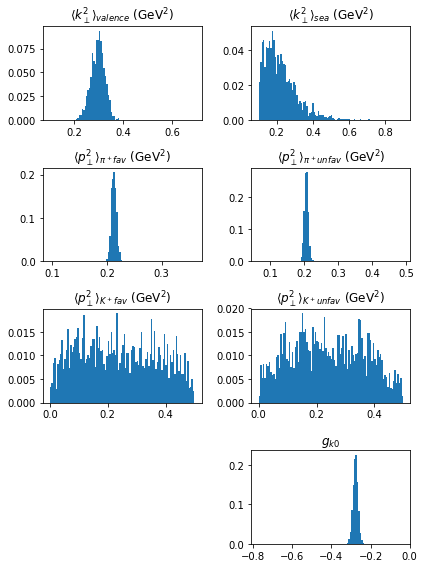

In [11]:
nrows,ncols=4,2
fig = py.figure(figsize=(ncols*3,nrows*2))


def title(par,kind):
    if par == 'widths1_uv':
        return r"$\langle k_\perp^2 \rangle_{valence}$ (GeV$^2$)"
    if par == 'widths1_sea':
        return r"$\langle k_\perp^2 \rangle_{sea}$ (GeV$^2$)"
    if par == 'widths1_fav' and kind == "ffpi":
        return r"$\langle p_\perp^2 \rangle_{\pi^+ fav}$ (GeV$^2$)"
    if par == 'widths1_ufav'and kind == "ffpi":
        return r"$\langle p_\perp^2 \rangle_{\pi^+ unfav}$ (GeV$^2$)"
    if par == 'widths1_fav' and kind == "ffk":
        return r"$\langle p_\perp^2 \rangle_{K^+ fav}$ (GeV$^2$)"
    if par == 'widths1_ufav'and kind == "ffk":
        return r"$\langle p_\perp^2 \rangle_{K^+ unfav}$ (GeV$^2$)"
    if par == 'gk0':
        return r"$g_{k0}$"
    if par == 'Q0'and kind == "gk":
        return r"$Q_0$ (GeV$^2$)"





global cnt
cnt=0
def plot(tags):
   global cnt
   for i in range(len(tags)):
       cnt+=1
       if tags[i]==None: continue
       ax=py.subplot(nrows,ncols,cnt)
       kind,par=tags[i].split('-')
       if kind=='pdf':
           vmin=conf['params']['pdf'][par]['min']
           vmax=conf['params']['pdf'][par]['max']
           R=(vmin,vmax)
       elif kind=='ffpi':
           vmin=conf['params']['ffpi'][par]['min']
           vmax=conf['params']['ffpi'][par]['max']
           R=(vmin,vmax)
       elif kind=='ffk':
           vmin=conf['params']['ffk'][par]['min']
           vmax=conf['params']['ffk'][par]['max']
           R=(vmin,vmax)
       elif kind=='sidis':
           vmin=conf['datasets']['sidis']['norm'][int(par)]['min']
           vmax=conf['datasets']['sidis']['norm'][int(par)]['max']
           R=(vmin,vmax)

       R=None
       #for k in runs:
       #    ax.hist(runs[k]['samples'].T[idx],weights=runs[k]['weights'],bins=50,normed=True,range=R)
       #ax.hist(tab[tags[i]],normed=True)
       #tabk=tab.query('nll<1300')
       ax.hist(tab[tags[i]],range=R,bins=100,weights=tab['weights'])
       #ax.set_title(par)
       ax.set_title(title(par,kind))

       
       #print samples.T[idx]
       #print weights
       #ax.hist(samples2.T[idx],weights=weights2,bins=50,color='r',histtype='step',normed=True,range=R)
       #ax.set_title(tags[i])
       #ax.set_xlim(vmin,vmax)
   py.tight_layout()


plot(['pdf-widths1_uv','pdf-widths1_sea'])
plot(['ffpi-widths1_fav','ffpi-widths1_ufav'])
plot(['ffk-widths1_fav','ffk-widths1_ufav'])
plot([None,'gk-gk0'])




## data vs theory

In [12]:
data={'weights':runs['all']['weights']}
cnt=0
for s in runs['all']['samples']:
    cnt+=1    
    lprint('%d/%d'%(cnt,len(runs['all']['samples'])))  
    conf['resman'].get_residuals(s);
    for k in conf['resman'].sidisres.tabs:
        if k  not in data: data[k]=[]
        thy=conf['resman'].sidisres.tabs[k]['thy']    
        norm=conf['datasets']['sidis']['norm'][k]['value']
        shift=conf['resman'].sidisres.tabs[k]['shift']        
        data[k].append(shift+thy/norm)
save(data,'%s/%s'%(path2results, sid_dy))   

4069/4069

### compute averages and collect results

In [13]:
data=load('%s/%s'%(path2results, sid_dy))   
for k in data: data[k]=np.array(data[k])
thy,dthy={},{}
for k in data:
    if k=='weights': continue
    thy[k]=np.einsum('i,ik->k',data['weights'],data[k])
    dthy[k]=np.einsum('i,ik->k',data['weights'],(data[k]-thy[k])**2)**0.5
for k in thy: 
    conf['resman'].sidisres.tabs[k]['thy']=copy.copy(thy[k])
    conf['resman'].sidisres.tabs[k]['dthy']=copy.copy(dthy[k])

In [14]:
report=conf['resman'].gen_report(verb=0,level=1)
delimiters=[]
for i in range(len(report)): 
    if 'reaction:' in report[i]: delimiters.append(i) 

data={}
nlines=len(report)
for i in range(len(delimiters)):
    ini=delimiters[i]
    if i==len(delimiters)-1: fin=len(report)
    else: fin=delimiters[i+1]
    reaction=report[ini].replace('reaction:','').strip()
    data[reaction]={'raw data':report[ini:fin]}
    
for k in data:
    print k
    block=data[k]['raw data']
    isep=[i for i in range(len(block)) if '--------' in block[i]][0]
    data[k]['summary']=[block[i] for i in range(isep)]
    data[k]['tables']=[block[i] for i in range(isep+1,len(block))]

    tabs={}
    for l in data[k]['tables']:
        info=l.split(',')
        col=[s for s in info if 'col' in s][0].split('=')[1].strip()
        if col not in tabs: tabs[col]={}
        info=[[ss.strip() for ss in s.split('=')] for s in info if 'col' not in info  if s.strip()!='']
        
        for s in info:
            if s[0] not in tabs[col]: tabs[col][s[0]]=[]
        
        for s in info:
            try:
                value=float(s[1])
            except:
                value=s[1]
            tabs[col][s[0]].append(value)        

    data[k]['tabs']=tabs
save(data,'%s/%s'%(path2results, dat_thy_dy))  

sidis


In [15]:
def summary():
    for k in data:
        print ""
        for l in data[k]['summary']: print l
summary()


reaction: sidis
    idx        tar        had        col        obs  npts       chi2  chi2/npts      rchi2      nchi2
   1000     proton        pi+     hermes          M    39      76.47       1.96        0.00       0.00
   1001     proton        pi-     hermes          M    39      62.57       1.60        0.00       0.00
   1004   deuteron        pi+     hermes          M    39      56.67       1.45        0.00       0.00
   1005   deuteron        pi-     hermes          M    39      30.79       0.79        0.00       0.00
   1007   deuteron         k-     hermes          M     1       0.19       0.19        0.00       0.00


### distribution of parameters

In [16]:
tab

,ffk-widths1_fav,ffk-widths1_ufav,ffpi-widths1_fav,ffpi-widths1_ufav,gk-gk0,nll,pdf-widths1_sea,pdf-widths1_uv,weights
0,0.123231,0.041996,0.210708,0.210588,-0.266973,112.885084,0.104419,0.316972,1.107541e-06
1,0.133112,0.105892,0.211518,0.211182,-0.268247,112.885543,0.104010,0.311389,1.112329e-06
2,0.081040,0.320961,0.210709,0.209179,-0.270771,112.888391,0.102391,0.318771,1.114473e-06
3,0.132491,0.128923,0.211832,0.210649,-0.269821,112.888998,0.100021,0.313083,1.119125e-06
4,0.198240,0.083799,0.212071,0.208255,-0.268246,112.889307,0.126700,0.309968,1.124133e-06
5,0.212146,0.081553,0.211530,0.209155,-0.271876,112.889311,0.113678,0.312139,1.129507e-06
6,0.309252,0.044003,0.210081,0.208389,-0.269136,112.889575,0.108562,0.321194,1.134612e-06
7,0.066489,0.125563,0.211639,0.210132,-0.267345,112.890343,0.116287,0.310756,1.139165e-06
8,0.320361,0.002646,0.211553,0.208340,-0.267367,112.890511,0.124928,0.312878,1.144424e-06
9,0.156541,0.031530,0.211565,0.208626,-0.271302,112.890790,0.117393,0.310524,1.149579e-06


In [17]:
np.mean(tab['pdf-widths1_uv'])
np.std(tab['pdf-widths1_sea'])

0.18593906127458346

0.2962226481490036 0.02818683033381516


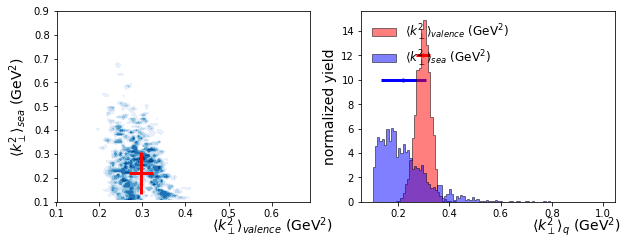

In [18]:
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from matplotlib.mlab import griddata


nrows,ncols=1,2
py.figure(figsize=(ncols*5,nrows*3.5))

samples2=runs['all']['samples']
weights2=runs['all']['weights']

ax=py.subplot(121)

xgrid = np.linspace(np.amin(tab['pdf-widths1_uv']), np.amax(tab['pdf-widths1_uv']), 100)
ygrid = np.linspace(np.amin(tab['pdf-widths1_sea']), np.amax(tab['pdf-widths1_sea']), 100)
xgrid, ygrid = np.meshgrid(xgrid, ygrid)
zgrid = griddata(tab['pdf-widths1_uv'],tab['pdf-widths1_sea'],weights2, xgrid, ygrid,interp='linear')
zgrid/=np.amax(zgrid)
ax.contourf(xgrid, ygrid, zgrid,cmap=cm.Blues,levels=[0.15,0.3,0.45,0.6,0.75,0.9,1.05])

meanval=np.einsum('i,i',tab['pdf-widths1_uv'],weights2)
stdval=np.einsum('i,i',(tab['pdf-widths1_uv']-meanval)**2,weights2)**0.5

meansea=np.einsum('i,i',tab['pdf-widths1_sea'],weights2)
stdsea=np.einsum('i,i',(tab['pdf-widths1_sea']-meansea)**2,weights2)**0.5


ax.errorbar([meanval],[meansea],xerr=stdval,yerr=stdsea,fmt='r.',elinewidth=3,alpha=1.)
 
#ax.tick_params(axis='both', which='major', labelsize=18, direction='in')
ax.set_xlabel(r"$\langle k_\perp^2 \rangle_{valence}$ (GeV$^2$)",size=14)
ax.xaxis.set_label_coords(0.85, -0.07)
#ax.set_xlim(0.0,0.55)
#ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5])
#ax.set_xticklabels([r'$\boldsymbol{0}$','',r'$\boldsymbol{0.2}$','',r'$\boldsymbol{0.4}$',''])
ax.set_ylabel(r"$\langle k_\perp^2 \rangle_{sea}$ (GeV$^2$)",size=14)

##############################################
ax=py.subplot(122)

R=(0.1,1.)
bins=100

ax.hist(tab['pdf-widths1_uv'],histtype='stepfilled',range=R,weights=weights2,bins=bins,facecolor='r'\
   ,edgecolor='k'\
   ,label=r"$\langle k_\perp^2 \rangle_{valence}$ (GeV$^2$)",normed=True,alpha=0.5,zorder=10);

ax.hist(tab['pdf-widths1_sea'],histtype='stepfilled',range=R,weights=weights2,bins=bins,facecolor='b'\
   ,edgecolor='k'\
   ,label=r"$\langle k_\perp^2 \rangle_{sea}$ (GeV$^2$)",normed=True,alpha=0.5,zorder=10);


ax.errorbar([meansea],10,xerr=stdsea,yerr=0,fmt='b.',elinewidth=3,alpha=1.)

ax.errorbar([meanval],12,xerr=stdval,yerr=0,fmt='r.',elinewidth=3,alpha=1.)


meanfffav=np.einsum('i,i',tab['ffpi-widths1_fav'],weights2)
stdfffav=np.einsum('i,i',(tab['ffpi-widths1_fav']-meanfffav)**2,weights2)**0.5

meanffunfav=np.einsum('i,i',tab['ffpi-widths1_ufav'],weights2)
stdffunfav=np.einsum('i,i',(tab['ffpi-widths1_ufav']-meanffunfav)**2,weights2)**0.5

meanffkfav=np.einsum('i,i',tab['ffk-widths1_fav'],weights2)
stdffkfav=np.einsum('i,i',(tab['ffk-widths1_fav']-meanffkfav)**2,weights2)**0.5

meanffkunfav=np.einsum('i,i',tab['ffk-widths1_ufav'],weights2)
stdffkunfav=np.einsum('i,i',(tab['ffk-widths1_ufav']-meanffkunfav)**2,weights2)**0.5

meangk0=np.einsum('i,i',tab['gk-gk0'],weights2)
stdgk0=np.einsum('i,i',(tab['gk-gk0']-meangk0)**2,weights2)**0.5

#meanQ0=np.einsum('i,i',tab['gk-Q0'],weights2)
#stdQ0=np.einsum('i,i',(tab['gk-Q0']-meangk0)**2,weights2)**0.5


descriptive_stat = [[dy,float(meanval), stdval], [dy,float(meansea), stdsea], [dy,float(meanfffav),stdfffav],
                    [dy,float(meanffunfav),stdffunfav], [dy,float(meanffkfav),stdffkfav],
                    [dy,float(meanffkunfav),stdffkunfav],[dy,float(meangk0),stdgk0]]


print meanval, stdval

#ax.tick_params(axis='both', which='major', labelsize=18, direction='in')
ax.set_xlabel(r"$\langle k_\perp^2 \rangle_{q}$ (GeV$^2$)",size=14)
#ax.set_xlim([0,1.5])
#ax.set_xticks([0,0.25,0.5,0.75,1,1.25])
#ax.set_xticklabels([r'$\boldsymbol{0}$','',r'$\boldsymbol{0.5}$','',r'$\boldsymbol{1}$',''])
ax.xaxis.set_label_coords(0.85, -0.07)
ax.set_ylabel(r'normalized yield',size=14)
#ax.set_ylim([0,7.5])
#ax.set_yticks([0,2,4,6])
#ax.set_yticklabels([r'$\boldsymbol{0}$',r'$\boldsymbol{2}$',r'$\boldsymbol{4}$',r'$\boldsymbol{6}$'])
ax.legend(frameon=False,fontsize=12,loc=2)
#ax.text(0.87,0.87,r'$\boldsymbol{\rm (b)}$',size=20,transform=ax.transAxes,color='k',alpha=1)

#py.tight_layout()
py.savefig("%s/%s" % (path2results, fig_seperation_dy))



In [19]:
descriptive_stat

[[3.25, 0.2962226481490036, 0.02818683033381516],
 [3.25, 0.22024829512794322, 0.08911615299243071],
 [3.25, 0.21247799283618563, 0.004754180352867279],
 [3.25, 0.20625744513640412, 0.005636504504756311],
 [3.25, 0.23915312638273098, 0.13416311193700622],
 [3.25, 0.23945783054431155, 0.12637299882552883],
 [3.25, -0.27742998010930675, 0.012834557383556638]]

### plot data and theory

In [20]:
from matplotlib import rc
rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})


data = pd.concat(pd.DataFrame(d)
                 for d in conf["resman"].sidisres.tabs.values())

data = data[(data["hadron"] == "pi+") &
            (data["target"] == "proton")]

In [21]:
#####################
# reading the data ##
#####################
#dat=pd.read_excel('E:/Laptop/School/Interships/Dr_Prokudin/Juniper82/PHYS296/dat/expdat/1000.xlsx');
#dat=pd.read_excel('C:/Users/Dolam/Documents/Scott/1000.xlsx');
dat=pd.read_excel('../../fitpack/database/sidis/expdata/1000.xlsx');

In [22]:
######################
# Calculated values ##
######################
dat["delta"] = np.sqrt(dat["stat_u"]**2.0) # measurment error

data["delta"] = np.sqrt(data["stat_u"]**2.0) # measurment error

In [23]:
##################
## Binning data ##
##################
# data bin edeges

xBin=np.array([0.023,0.047,0.075,0.12,0.35,0.6]) # Bins for x used to plot Pt
Q2Bin=np.array([1.0,10]) # **NOTE** includes all Q2 data, therefore all value data is plotted vs. Pt
zBin= np.array([0.1, 0.2,0.25,0.3, 0.375, 0.475, 0.6, 0.8, 1.1]) # catagories for z to be ploted indiviualy in each subplot

# binning data
dat['xBin'] = pd.cut(dat['x'], xBin,labels = False, retbins=0)
dat['Q2Bin'] = pd.cut(dat['Q2'], Q2Bin,labels = False, retbins=0)
dat['zBin'] = pd.cut(dat['z'], zBin,labels = False, retbins=0)

data['xBin'] = pd.cut(data['x'], xBin,labels = False, retbins=0)
data['Q2Bin'] = pd.cut(data['Q2'], Q2Bin,labels = False, retbins=0)
data['zBin'] = pd.cut(data['z'], zBin,labels = False, retbins=0)

# bins for x and y that have non-empty intersection
pTdatmod=[0,1,2,3,4] # xBins that overlap Q2Bins
valuedatmod=[0] # Q2bins that overlap xBins

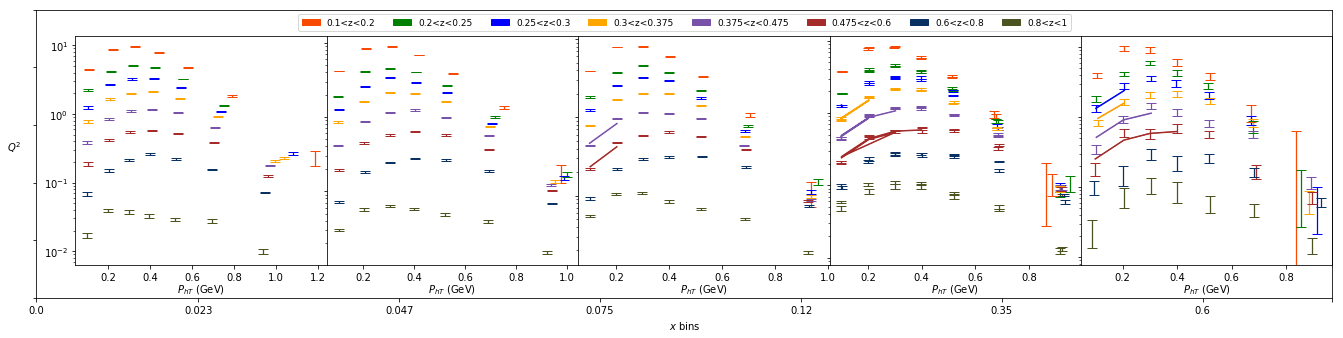

In [24]:
###############
# HermesPlot ##
###############  Reduced matix 
# initialize the figure
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages

fig1=plt.figure(figsize=(18, 4),facecolor="white") # figsize; wxh in inche
globalGrid=gridspec.GridSpec(1, 1,left=0.03,right=1,top=.91,bottom=.115, wspace=0.0, hspace=0.0) # plot for subplot matrix as 1x1 matrix
innerGrid=gridspec.GridSpecFromSubplotSpec(1,5 , subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) # 5x6 subplot grid 

# figure properties:
ax=fig1.add_axes([0,0,1,1]) # axas for subplot matrix as percent of hole
#ax.yaxis.set_ticks([0,1.25,2.76,4.27,5.78,7.29,8.8,10])
ax.xaxis.set_ticks([0,1.25,2.8,4.35,5.9,7.45,9,10 ])
xticklabels = np.array([0,0.023,0.047,0.075,0.12,0.35,0.6]) 

ax.set_yticklabels("")
ax.set_xticklabels(xticklabels)
ax.set_xlabel(r"$x$ bins") # xy-lables
ax.set_ylabel(r"$Q^2$",rotation="horizontal",labelpad = 15)
#ax.grid() # grid currently off

# subplot axis proerties (unused)
Zcolor=['#F74902',"green","blue",'orange',"#7851a9","brown",'#093162','#4b5320']
Zmark=["o","o","o","o"]

# Set legend
Zpatch1 = mpatches.Patch(color=Zcolor[0], label='0.1<z<0.2')
Zpatch2 = mpatches.Patch(color=Zcolor[1], label='0.2<z<0.25')
Zpatch3 = mpatches.Patch(color=Zcolor[2], label='0.25<z<0.3')
Zpatch4 = mpatches.Patch(color=Zcolor[3], label='0.3<z<0.375')
Zpatch5 = mpatches.Patch(color=Zcolor[4], label='0.375<z<0.475')
Zpatch6 = mpatches.Patch(color=Zcolor[5], label='0.475<z<0.6')
Zpatch7 = mpatches.Patch(color=Zcolor[6], label='0.6<z<0.8')
Zpatch8 = mpatches.Patch(color=Zcolor[7], label='0.8<z<1')
          
ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3,Zpatch4,Zpatch5,Zpatch6,Zpatch7,Zpatch8],
          loc='upper center',
          ncol=8,prop={'size': 9}
          )
          
for f,F in zip(range(len(pTdatmod)),pTdatmod):       
    for j,J in zip(range(len(valuedatmod)),valuedatmod):
        
        k = int(f) # kth possition for subplot on innerGrid matrix
        maskX = dat['xBin'].isin([F]) # returns boolean for all Jth xBin in dat  
        maskY = dat['Q2Bin'].isin([J]) # returns boolean for all Fth Q2Bin in dat
        
        maskX_thr = data['xBin'].isin([F]) # returns boolean for all Jth xBin in dat  
        maskY_thr = data['Q2Bin'].isin([J]) # returns boolean for all Fth Q2Bin in dat
       
        ax = fig1.add_subplot(innerGrid[k]) # add subplot in innerGrid
        xydat = dat[maskX & maskY] # subset of data for Jth xBin and Fth Q2Bin
        
        xydata = data[maskX_thr & maskY_thr] # subset of data for Jth xBin and Fth Q2Bin
        
        for z in range(len(zBin)-1): 
            maskZ = xydat["zBin"].isin([z])
            databin = xydat[maskZ]
            
            maskZ_thr = xydata["zBin"].isin([z])
            databin_thr = xydata[maskZ_thr]
            
            if f != 0:
                ax.errorbar(databin['pT'],databin['value'],yerr=databin['delta'],capsize=5,linestyle="",color = Zcolor[z],elinewidth=1.25)
                ax.set_xlabel(r"$p_T$ (GeV)",labelpad=1)
                ax.set_yscale('log')
                ax.set_yticklabels('')
                
                ax.plot(databin_thr['pT'],databin_thr['thy'],linestyle="-",color = Zcolor[z]) # theory
                ax.fill_between(databin_thr['pT'],databin_thr['thy']-databin_thr['dthy'],databin_thr['thy']+databin_thr['dthy']) # theory error
                ax.set_xlabel(r"$P_{hT}$ (GeV)",labelpad=1)
                ax.set_yticklabels('')
               
            else:
                ax.errorbar(databin['pT'],databin['value'],yerr=databin['delta'],capsize=5,linestyle="", color = Zcolor[z],elinewidth=1.25)
                
                ax.plot(databin_thr['pT'],databin_thr['thy'],linestyle="-",color = Zcolor[z]) #theory
                ax.fill_between(databin_thr['pT'],databin_thr['thy']-databin_thr['dthy'],databin_thr['thy']+databin_thr['dthy']) # theory error

                
                ax.set_xlabel(r"$P_{hT}$ (GeV)",labelpad=1)
                ax.set_yscale('log')
plt.savefig("%s/%s" % (path2results, fig_hermes_dy))             

## writing descriptive stats

In [25]:
import pickle
path2stat='sidis_hermes_torino_alexei_dy'
checkdir(path2stat)

dictionary = {'val':descriptive_stat[0], 'sea':descriptive_stat[1],'fav': descriptive_stat[2], 
               'unfav': descriptive_stat[3],'kfav':descriptive_stat[4],'kunfav':descriptive_stat[5],
              'gk0':descriptive_stat[6]}

with open(path2stat+'/descriptive_alexei_dy'+prefix+'.pkl', "wb") as f:
        pickle.dump(dictionary,f)